<a href="https://colab.research.google.com/github/LucasMirandaVS/projeto_time_series_prediction/blob/main/decomposi%C3%A7%C3%A3o%2C_tendencia_e_sazonalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os pacotes necessários

In [1]:
!pip install -q statsmodels==0.12.1

In [2]:
# Limpeza e dataviz
import numpy as np
import pandas as pd
import datetime as date
import matplotlib.pyplot as plt
import seaborn as sns

# filtrando os avisos do console
import warnings
warnings.filterwarnings('ignore')

# Testes estatísticos
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

# Importando os dados

In [3]:
url = 'https://github.com/alura-cursos/Alura-COVID2/raw/main/casos-brasil.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])

In [4]:
df.head()

,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
semana,,,,,,,,,,,,,,,,,
9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


# Limpeza e manipulação dos dados

In [5]:
df['data'] = pd.to_datetime(df['data'])
df['data'] = pd.to_datetime(df.data).dt.date
df.tail()

,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
semana,,,,,,,,,,,,,,,,,
31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190
31,2020-07-31,Brazil,TOTAL,TOTAL,1267,92728,53264,2670451,92475,2662485,44.12528,1270.75305,0.03472,2008854.0,1079525.0,6988772.0,3325.65673


### Selecionando os estados de interesse

In [6]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
semana,,,,,,,,,,,,,,,,,
9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [28]:
# Agora RJ, MG e ES
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']
df_es = df[df['estado'] == 'ES']

# Definindo a decomposição, tendencia e sazonalidade

In [29]:
# Conferindo que a coluna de data é um objeto date
df_sp.index = pd.to_datetime(df_sp.data)
df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)
df_es.index = pd.to_datetime(df_es.data)

In [30]:
# SP
resultados_sp = seasonal_decompose(df_sp.novosObitos, freq = 7)
# MG
resultados_rj = seasonal_decompose(df_rj.novosObitos, freq = 7)
# RJ
resultados_mg = seasonal_decompose(df_mg.novosObitos, freq = 7)
# ES
resultados_es = seasonal_decompose(df_es.novosObitos, freq = 7)

# Visualizando os dados

In [31]:
# Função que plota os gráficos de 3 em 3
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.legend(fontsize=18)

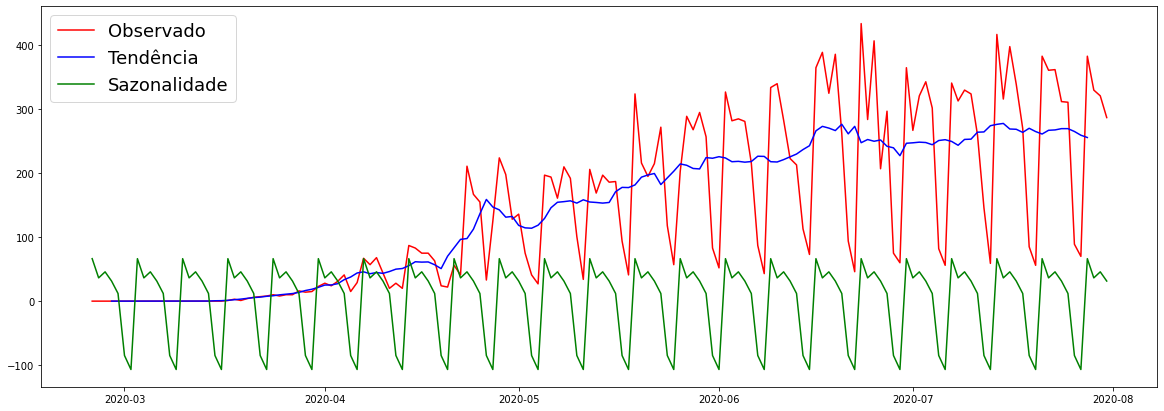

In [21]:
# SP
plotar(resultados_sp.observed, resultados_sp.trend, resultados_sp.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade')

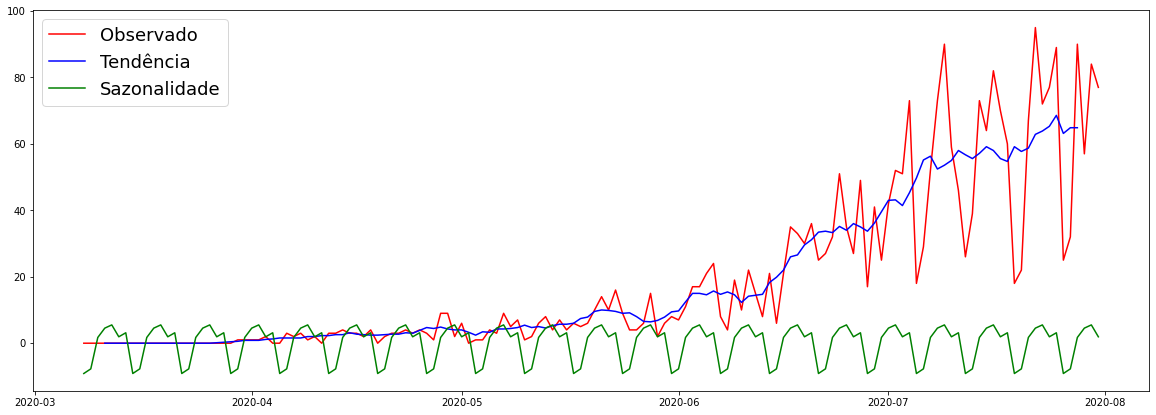

In [24]:
# MG
plotar(resultados_mg.observed, resultados_mg.trend, resultados_mg.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade')

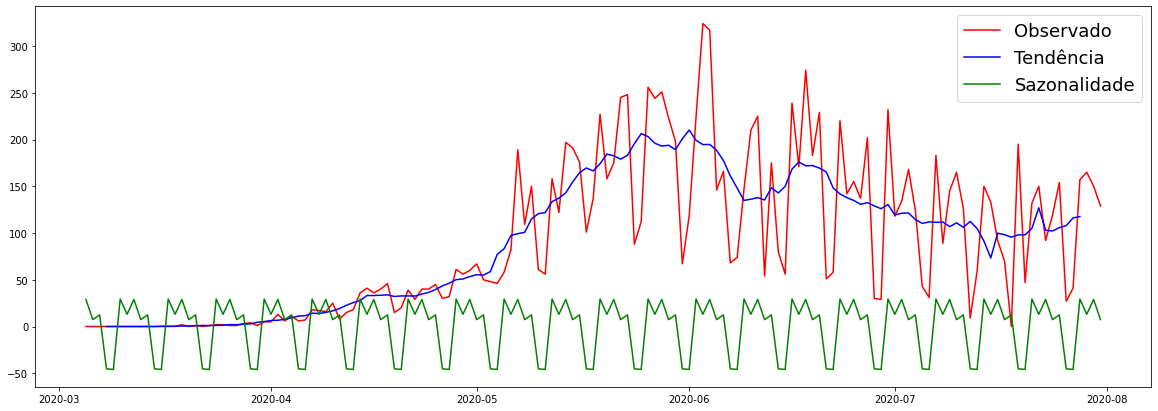

In [25]:
# RJ
plotar(resultados_rj.observed, resultados_rj.trend, resultados_rj.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade')

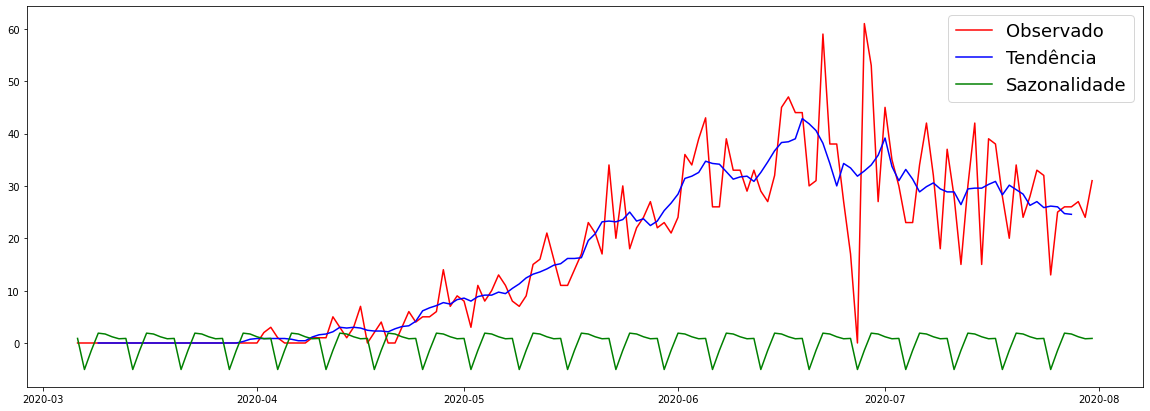

In [32]:
# ES
plotar(resultados_es.observed, resultados_es.trend, resultados_es.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade')

### Comparando os estados

In [33]:
# Função que plota os gráficos de 4 em 4
def plotar_2(y1,y2,y3,y4,cor1,cor2,cor3,cor4,label1,label2,label3,label4):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.plot(y4,color=cor4,label=label4)
    plt.legend(fontsize=18)

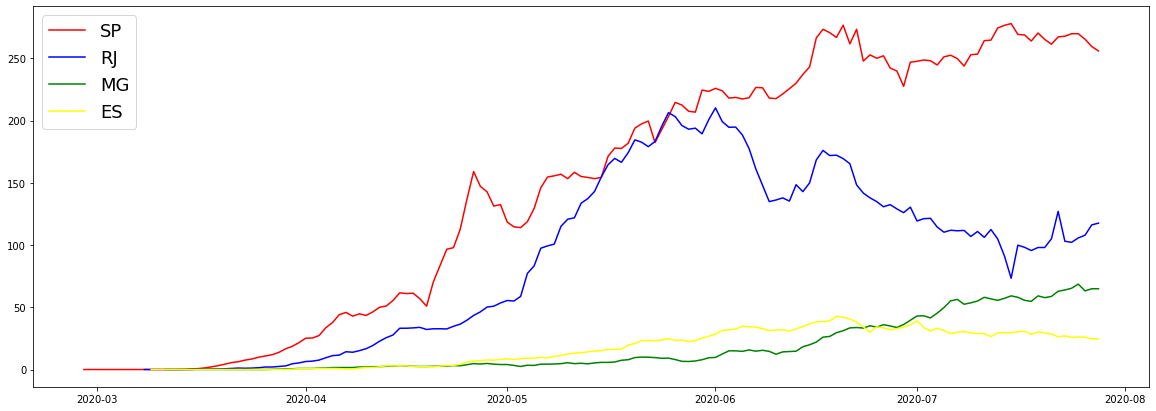

In [38]:
# Tendencia
plotar_2(resultados_sp.trend, resultados_rj.trend,resultados_mg.trend, resultados_es.trend, 'red','blue','green','yellow',
      'SP','RJ','MG','ES')

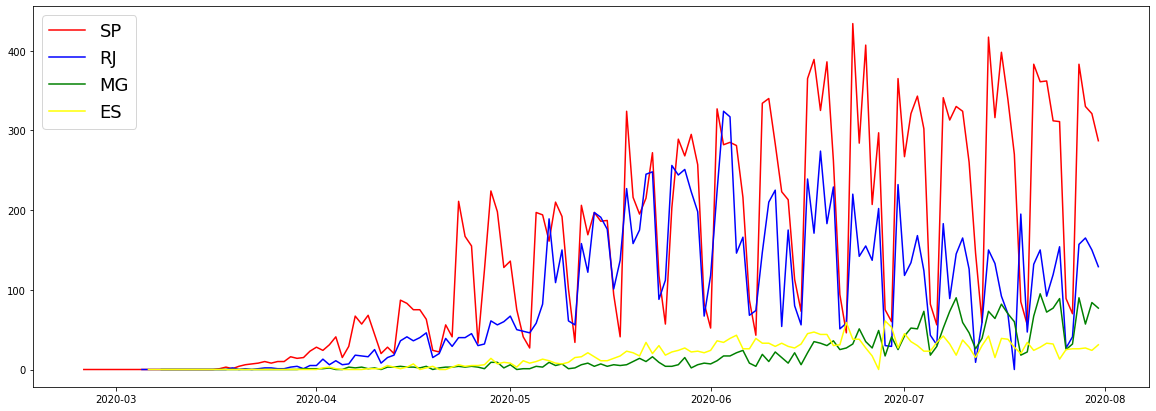

In [39]:
# Observado
plotar_2(resultados_sp.observed, resultados_rj.observed,resultados_mg.observed, resultados_es.observed, 'red','blue','green','yellow',
      'SP','RJ','MG','ES')

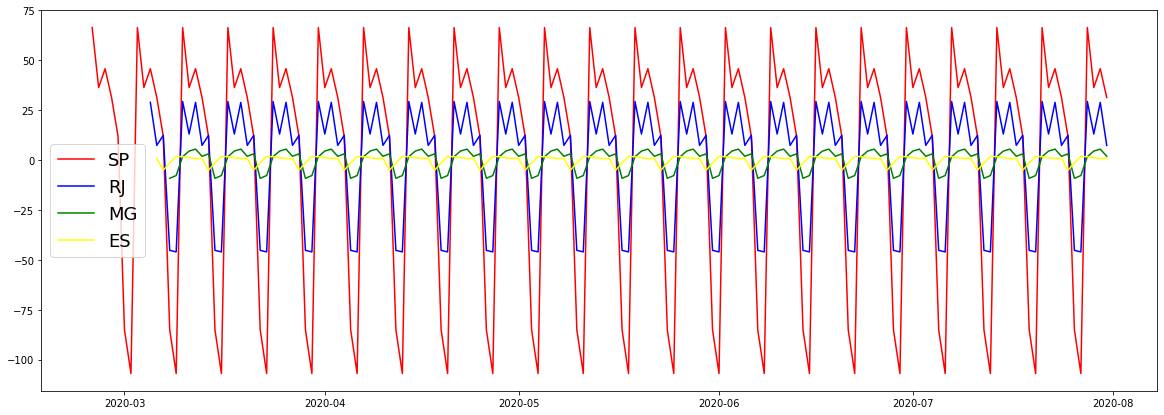

In [41]:
# Sazonalidade
plotar_2(resultados_sp.seasonal, resultados_rj.seasonal,resultados_mg.seasonal, resultados_es.seasonal, 'red','blue','green','yellow',
      'SP','RJ','MG','ES')